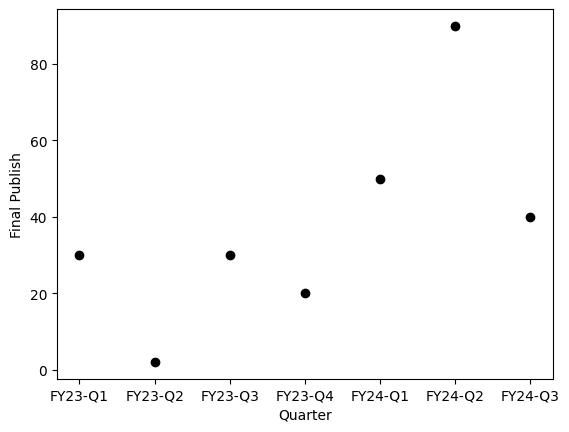

Fitting 3 folds for each of 100 candidates, totalling 300 fits


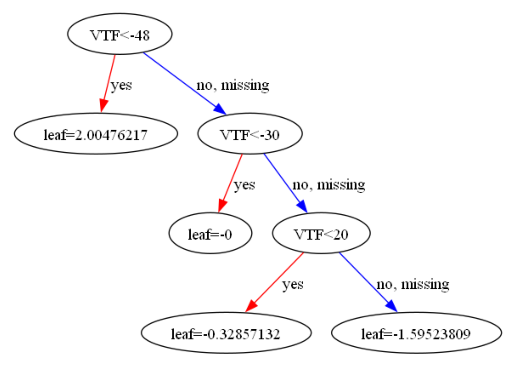

Predicted Final Publish: 29.70328712463379
Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'alpha': 5}


In [38]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Input historical data
data_history = pd.DataFrame({
    "VTF": [-30, 20, -30, 20, -50, -90, -48],
    "Before Publish Actuals": [200, 180, 160, 160, 150, 150, 152],
    "Publish 1": [2, 14, 3, 5, 6, 8, 9],
    "Final Publish": [30, 2, 30, 20, 50, 90, 40],
    "Time" : ["FY23-Q1", "FY23-Q2", "FY23-Q3", "FY23-Q4", "FY24-Q1", "FY24-Q2", "FY24-Q3"]
})

#make time as index
data_history.set_index('Time', inplace=True)


# Plot the data
plt.figure()
plt.plot(data_history.index, data_history['Final Publish'], 'o', color='black')
plt.xlabel('Quarter')
plt.ylabel('Final Publish')
plt.show()

# Data for prediction
data_to_predict = pd.DataFrame({
    "VTF": [-10],
    "Before Publish Actuals": [200],
    "Publish 1": [5]
})

# Define features and labels
X = data_history[["VTF", "Before Publish Actuals", "Publish 1"]]
y = data_history["Final Publish"]

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')



# Hyperparameter grid
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'alpha': [5, 10, 15],
    'n_estimators': [10, 50, 100]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X, y)



# Best estimator
best_xgb_model = random_search.best_estimator_
plot_tree(best_xgb_model,num_trees=0, rankdir='TB')
 # `num_trees` is used to specify which tree you want to plot
  # Adjust the figure size as necessary
plt.show()
# Predict the 'Final Publish' for the new data
final_publish_prediction = best_xgb_model.predict(data_to_predict)

# Output the prediction and best parameters
print(f"Predicted Final Publish: {final_publish_prediction[0]}")
print(f"Best parameters: {random_search.best_params_}")

In [25]:
best_xgb_model.n_estimators

100

Predicted Final Publish: 29.70328712463379
Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'alpha': 5}


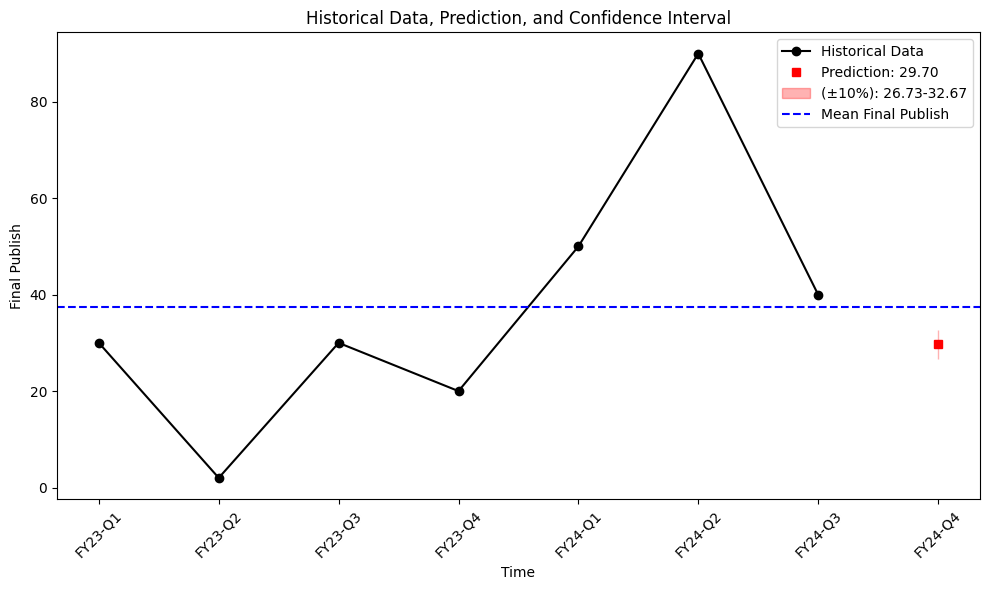

In [42]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# Your data loading and model training code here

# Best estimator has been found
best_xgb_model = random_search.best_estimator_

# Predict the 'Final Publish' for the new data
final_publish_prediction = best_xgb_model.predict(data_to_predict)

# Print the prediction and best parameters
print(f"Predicted Final Publish: {final_publish_prediction[0]}")
print(f"Best parameters: {random_search.best_params_}")

# Calculate the mean of the 'Final Publish' historical data
mean_final_publish = data_history['Final Publish'].mean()

# Simplified assumption for confidence interval (e.g., ±10% of the prediction)
confidence_interval = [final_publish_prediction[0] * 0.9, final_publish_prediction[0] * 1.1]

# Plotting
plt.figure(figsize=(10, 6))
# Historical data
plt.plot(data_history.index, data_history['Final Publish'], 'o-', color='black', label='Historical Data')
# Prediction
predicted_time = "FY24-Q4"
plt.plot(predicted_time, final_publish_prediction[0], 's', color='red', label=f'Prediction: {final_publish_prediction[0]:.2f} ')
# Confidence interval for the prediction
plt.fill_between([predicted_time], confidence_interval[0], confidence_interval[1], color='red', alpha=0.3, label=f'(±10%): {confidence_interval[0]:.2f}-{confidence_interval[1]:.2f}')
# Mean of 'Final Publish' as a horizontal line
plt.axhline(y=mean_final_publish, color='blue', linestyle='--', label='Mean Final Publish')

#label

# Enhancements
plt.xlabel('Time')
plt.ylabel('Final Publish')
plt.xticks(rotation=45)
plt.title('Historical Data, Prediction, and Confidence Interval')
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
data_history

,VTF,Before Publish Actuals,Publish 1,Final Publish,Final VTF
Time,,,,,
FY23-Q1,-30,200,2,30,0
FY23-Q2,20,180,14,2,22
FY23-Q3,-30,160,3,30,0
FY23-Q4,20,160,5,20,40
FY24-Q1,-50,150,6,50,0
FY24-Q2,-90,150,8,90,0
FY24-Q3,-48,152,9,40,-8


In [62]:
data_history['Final VTF'] = data_history['VTF'] + data_history['Final Publish']
data_history

,VTF,Before Publish Actuals,Publish 1,Final Publish,Final VTF
Time,,,,,
FY23-Q1,-30,200,2,30,0
FY23-Q2,20,180,14,2,22
FY23-Q3,-30,160,3,30,0
FY23-Q4,20,160,5,20,40
FY24-Q1,-50,150,6,50,0
FY24-Q2,-90,150,8,90,0
FY24-Q3,-48,152,9,40,-8


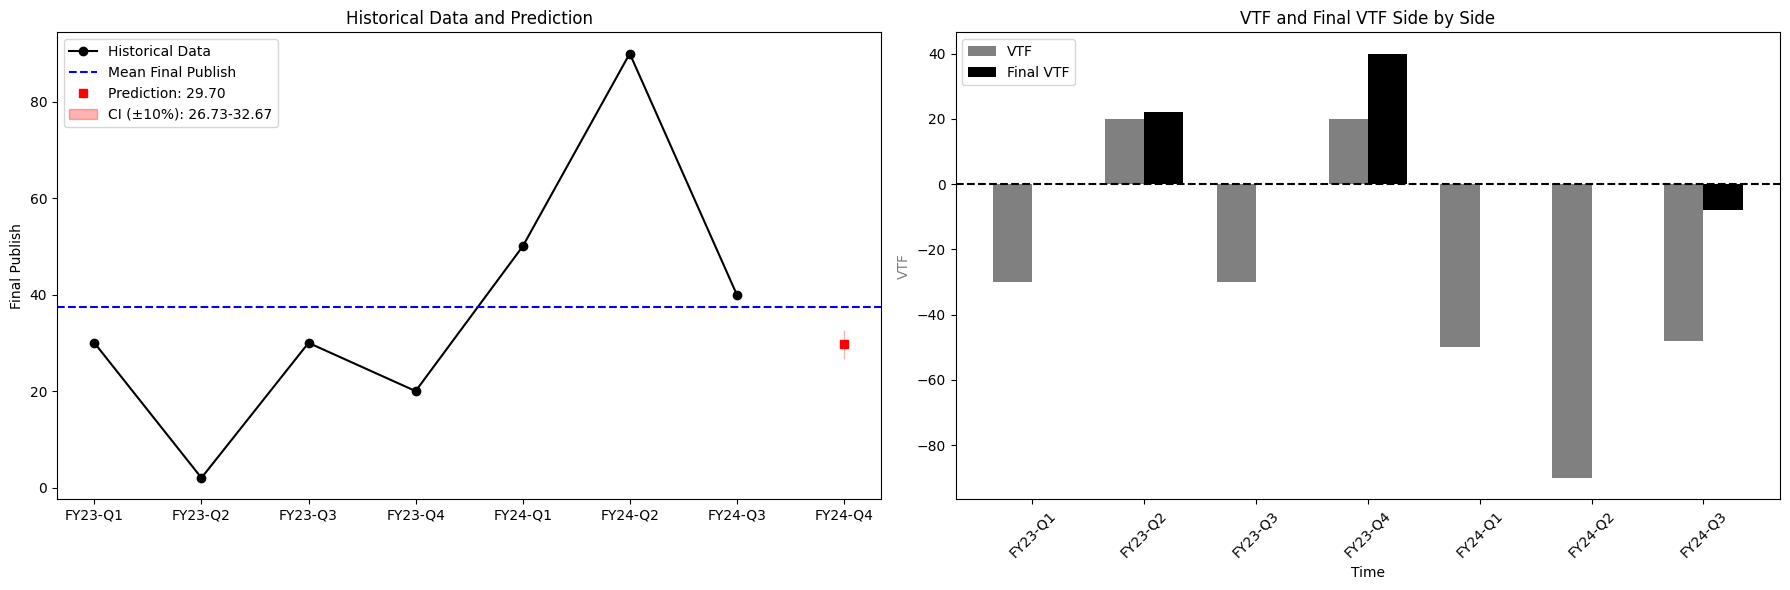

In [50]:
import numpy as np

# Assuming 'Final VTF' is a column in your 'data_history' DataFrame. If not, add it.
# Example: data_history['Final VTF'] = [some_values]

# Create figure and axes objects for side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Change to a 1x2 subplot grid

# Plot 'Final Publish' data on the first subplot (ax1)
ax1.plot(data_history.index, data_history['Final Publish'], 'o-', color='black', label='Historical Data')
ax1.set_ylabel('Final Publish', color='black')
ax1.axhline(y=mean_final_publish, color='blue', linestyle='--', label='Mean Final Publish')
ax1.plot(predicted_time, final_publish_prediction[0], 's', color='red', label=f'Prediction: {final_publish_prediction[0]:.2f}')
ax1.fill_between([predicted_time], confidence_interval[0], confidence_interval[1], color='red', alpha=0.3, label=f'CI (±10%): {confidence_interval[0]:.2f}-{confidence_interval[1]:.2f}')
ax1.legend(loc='upper left')
ax1.set_title('Historical Data and Prediction')

# Define bar width for grouped bars
bar_width = 0.35

# Calculate bar positions for 'VTF' and 'Final VTF'
indices = np.arange(len(data_history.index))
vtf_positions = indices - bar_width/2
final_vtf_positions = indices + bar_width/2

# Plot 'VTF' data as bars on the second subplot (ax2)
ax2.bar(vtf_positions, data_history['VTF'], width=bar_width, color='grey', label='VTF')

# Plot 'Final VTF' data as bars next to 'VTF'
ax2.bar(final_vtf_positions, data_history['Final VTF'], width=bar_width, color='black', label='Final VTF')

ax2.set_ylabel('VTF', color='grey')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Time')
ax2.set_xticks(indices)
ax2.set_xticklabels(data_history.index)
ax2.legend(loc='upper left')
ax2.set_title('VTF and Final VTF Side by Side')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


Fitting 3 folds for each of 100 candidates, totalling 300 fits


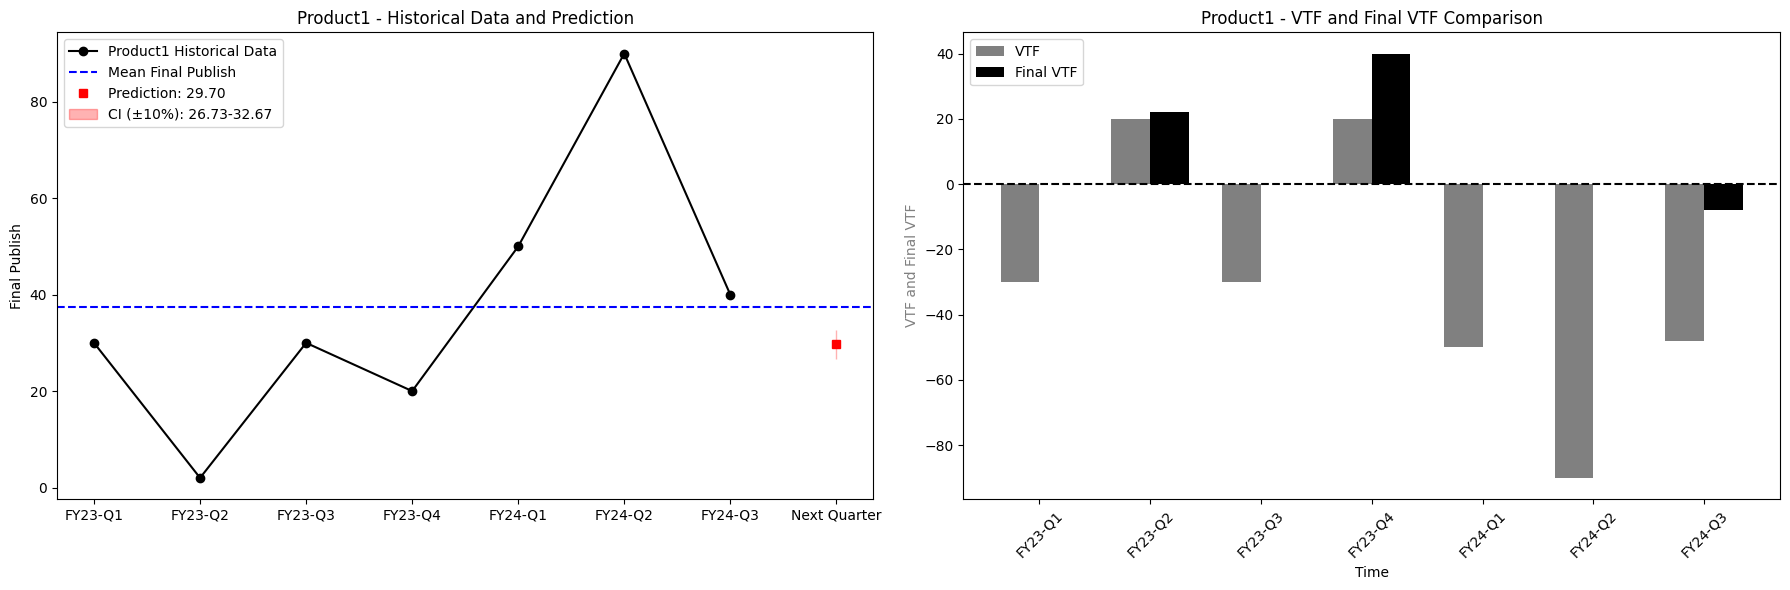

Product1 - Predicted Final Publish: 29.70328712463379
Product1 - Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'alpha': 5}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


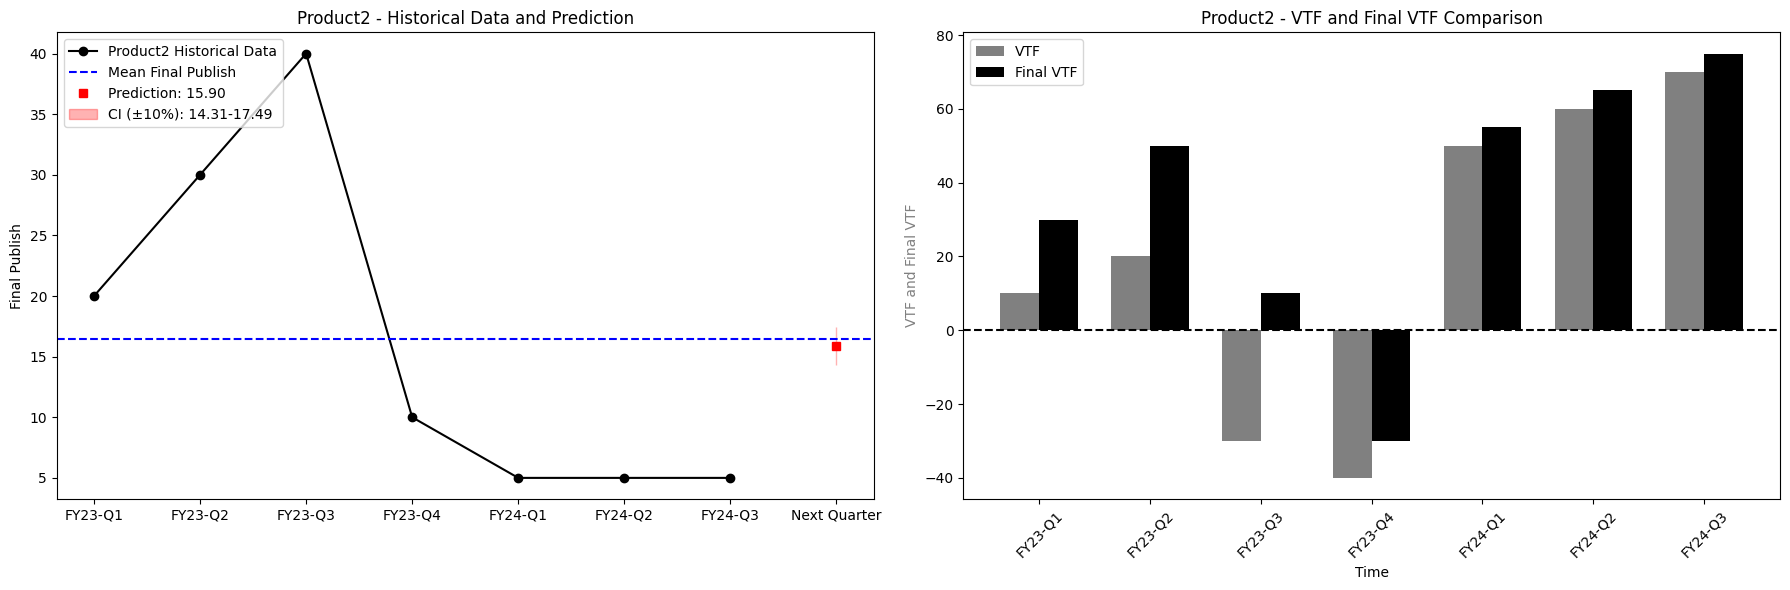

Product2 - Predicted Final Publish: 15.896500587463379
Product2 - Best parameters: {'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.3, 'alpha': 5}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


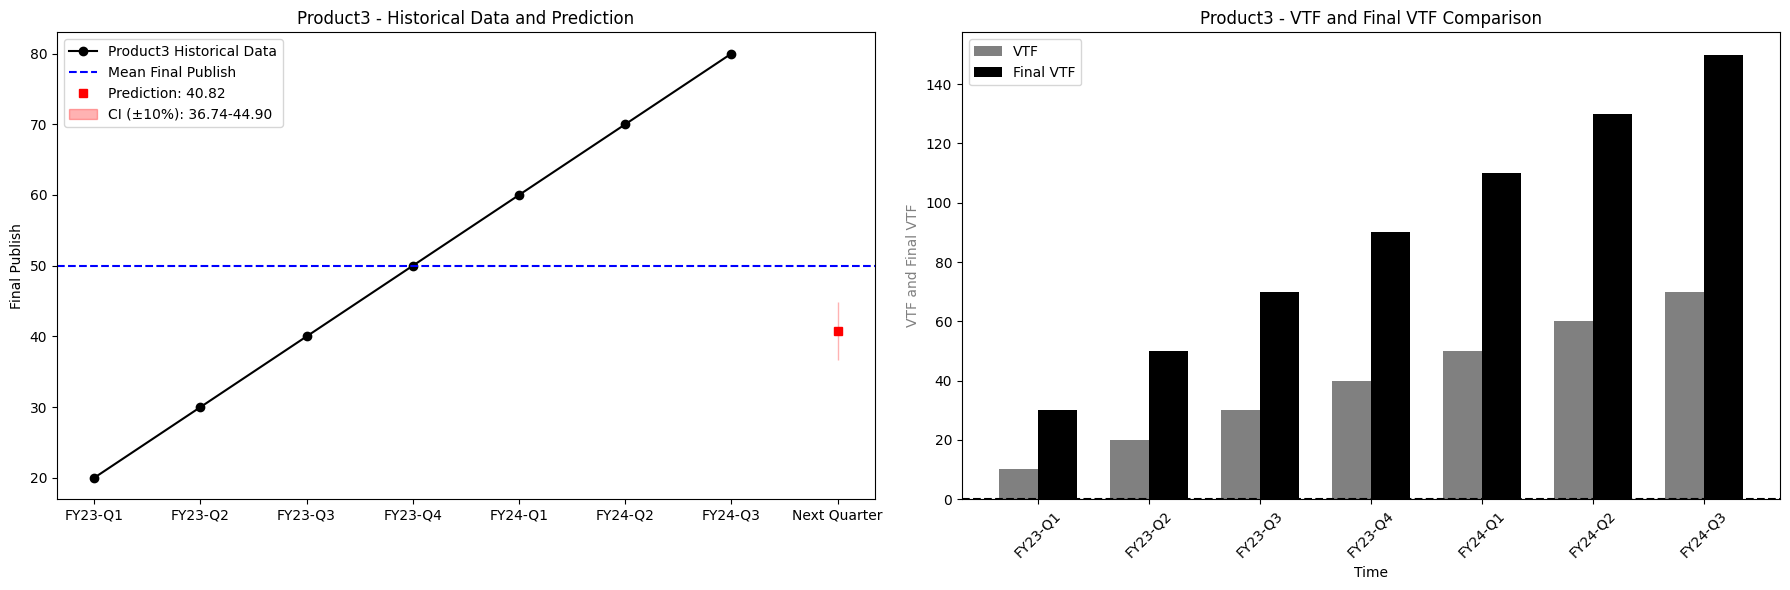

Product3 - Predicted Final Publish: 40.820526123046875
Product3 - Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.3, 'alpha': 5}


In [65]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# Adjusted function to include product name and side-by-side plots
def analyze_product_data(product_name, product_data, data_to_predict):
    # Convert dictionary to DataFrame
    data_history = pd.DataFrame(product_data)
    data_to_predict = pd.DataFrame(data_to_predict)
    
    # Make 'Time' as index
    data_history.set_index('Time', inplace=True)

    # Add 'Final VTF' column by combining 'VTF' and 'Final Publish'
    data_history['Final VTF'] = data_history['VTF'] + data_history['Final Publish']

    # Define features and labels
    X = data_history[["VTF", "Before Publish Actuals", "Publish 1"]]
    y = data_history["Final Publish"]
    
    # Initialize the XGBoost regressor model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

    # Hyperparameter grid
    param_grid = {
        'colsample_bytree': [0.3, 0.7],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'alpha': [5, 10, 15],
        'n_estimators': [10, 50, 100]
    }
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1)
    
    # Fit the model
    random_search.fit(X, y)

    # Best estimator
    best_xgb_model = random_search.best_estimator_

    # Predict the 'Final Publish' for the new data
    # This part should ideally be adjusted based on how you generate or store new data for predictions.
   
    final_publish_prediction = best_xgb_model.predict(data_to_predict)

    # Assuming this is the time period you're predicting for
    predicted_time = "Next Quarter"

    # Create figure and axes objects for side-by-side subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 'Final Publish' data on the first subplot (ax1)
    ax1.plot(data_history.index, data_history['Final Publish'], 'o-', color='black', label=f'{product_name} Historical Data')
    mean_final_publish = data_history['Final Publish'].mean()
    confidence_interval = [final_publish_prediction[0] * 0.9, final_publish_prediction[0] * 1.1]
    ax1.set_ylabel('Final Publish', color='black')
    ax1.axhline(y=mean_final_publish, color='blue', linestyle='--', label='Mean Final Publish')
    ax1.plot(predicted_time, final_publish_prediction[0], 's', color='red', label=f'Prediction: {final_publish_prediction[0]:.2f}')
    ax1.fill_between([predicted_time], confidence_interval[0], confidence_interval[1], color='red', alpha=0.3, label=f'CI (±10%): {confidence_interval[0]:.2f}-{confidence_interval[1]:.2f}')
    ax1.legend(loc='upper left')
    ax1.set_title(f'{product_name} - Historical Data and Prediction')

    # Plot 'VTF' and 'Final VTF' on the second subplot (ax2)
    bar_width = 0.35
    indices = np.arange(len(data_history.index))
    vtf_positions = indices - bar_width/2
    final_vtf_positions = indices + bar_width/2
    ax2.bar(vtf_positions, data_history['VTF'], width=bar_width, color='grey', label='VTF')
    ax2.bar(final_vtf_positions, data_history['Final VTF'], width=bar_width, color='black', label='Final VTF')
    ax2.set_ylabel('VTF and Final VTF', color='grey')
    ax2.axhline(y=0, color='black', linestyle='--')
    ax2.set_xlabel('Time')
    ax2.set_xticks(indices)
    ax2.set_xticklabels(data_history.index, rotation=45)
    ax2.legend(loc='upper left')
    ax2.set_title(f'{product_name} - VTF and Final VTF Comparison')

    plt.tight_layout()
    plt.show()

    # Output the prediction and best parameters
    print(f"{product_name} - Predicted Final Publish: {final_publish_prediction[0]}")
    print(f"{product_name} - Best parameters: {random_search.best_params_}")

# Example usage with a list of dictionaries, each containing product name and data
list_of_products = [
    {
        "name": "Product1",
        "data": {
            "VTF": [-30, 20, -30, 20, -50, -90, -48],
            "Before Publish Actuals": [200, 180, 160, 160, 150, 150, 152],
            "Publish 1": [2, 14, 3, 5, 6, 8, 9],
            "Final Publish": [30, 2, 30, 20, 50, 90, 40],
            "Time": ["FY23-Q1", "FY23-Q2", "FY23-Q3", "FY23-Q4", "FY24-Q1", "FY24-Q2", "FY24-Q3"]
        },
        "data_to_predict": {
            "VTF": [-10],
            "Before Publish Actuals": [200],
            "Publish 1": [5]
        }
    },
    {
        "name": "Product2",
        "data": {
            "VTF": [10, 20, -30, -40, 50, 60, 70],
            "Before Publish Actuals": [100, 150, 200, 250, 300, 350, 400],
            "Publish 1": [5, 10, 15, 20, 25, 30, 35],
            "Final Publish": [20, 30, 40, 10, 5, 5, 5],
            "Time": ["FY23-Q1", "FY23-Q2", "FY23-Q3", "FY23-Q4", "FY24-Q1", "FY24-Q2", "FY24-Q3"]
        },
        "data_to_predict": {
            "VTF": [60],
            "Before Publish Actuals": [300],
            "Publish 1": [10]
        }
    },
    # Add more products as needed
    {
        "name": "Product3",
        "data": {
            "VTF": [10, 20, 30, 40, 50, 60, 70],
            "Before Publish Actuals": [100, 150, 200, 250, 300, 350, 400],
            "Publish 1": [5, 10, 15, 20, 25, 30, 35],
            "Final Publish": [20, 30, 40, 50, 60, 70, 80],
            "Time": ["FY23-Q1", "FY23-Q2", "FY23-Q3", "FY23-Q4", "FY24-Q1", "FY24-Q2", "FY24-Q3"]
        },
        "data_to_predict": {
            "VTF": [5],
            "Before Publish Actuals": [300],
            "Publish 1": [10]
        }
    
    }

]

for product in list_of_products:
    analyze_product_data(product["name"], product["data"], product["data_to_predict"])


Fitting 3 folds for each of 100 candidates, totalling 300 fits


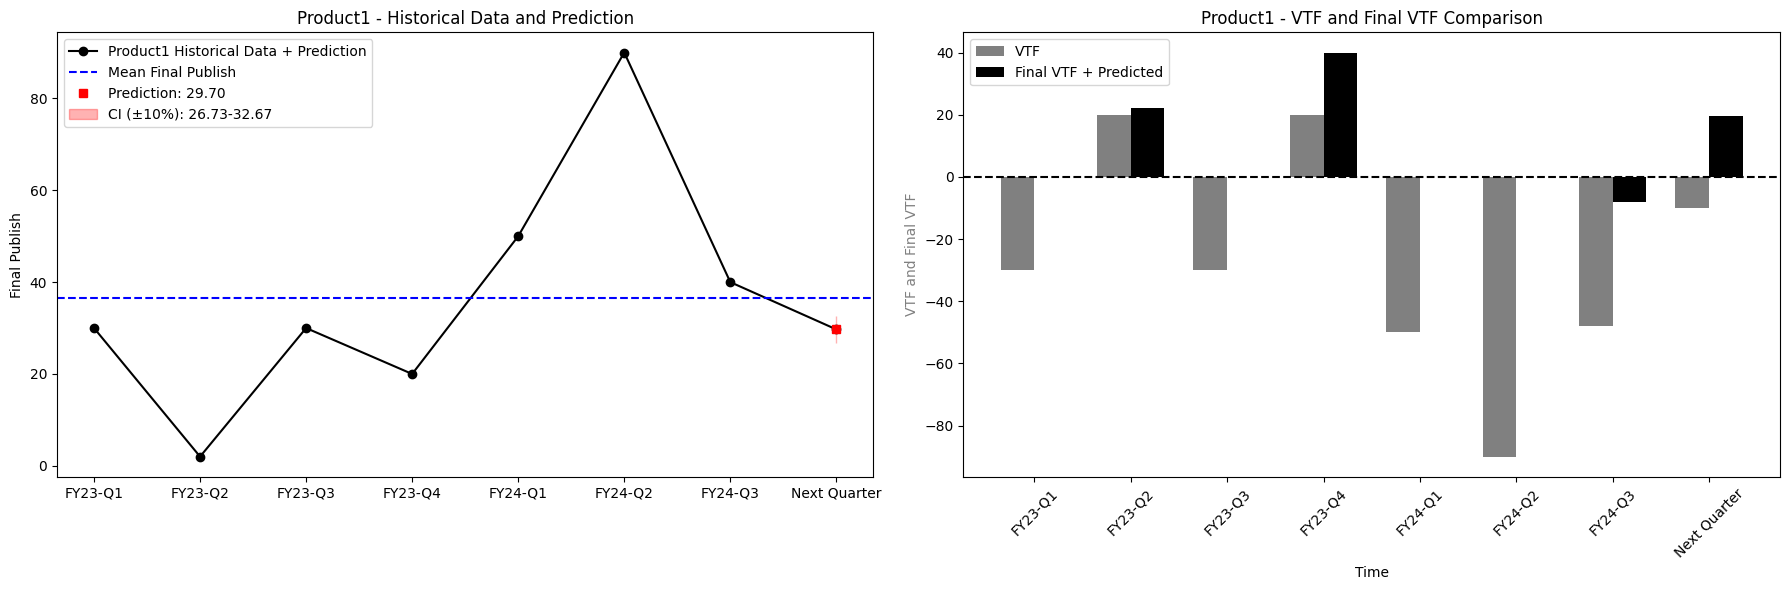

Product1 - Predicted Final Publish: 29.70328712463379
Product1 - Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'alpha': 5}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


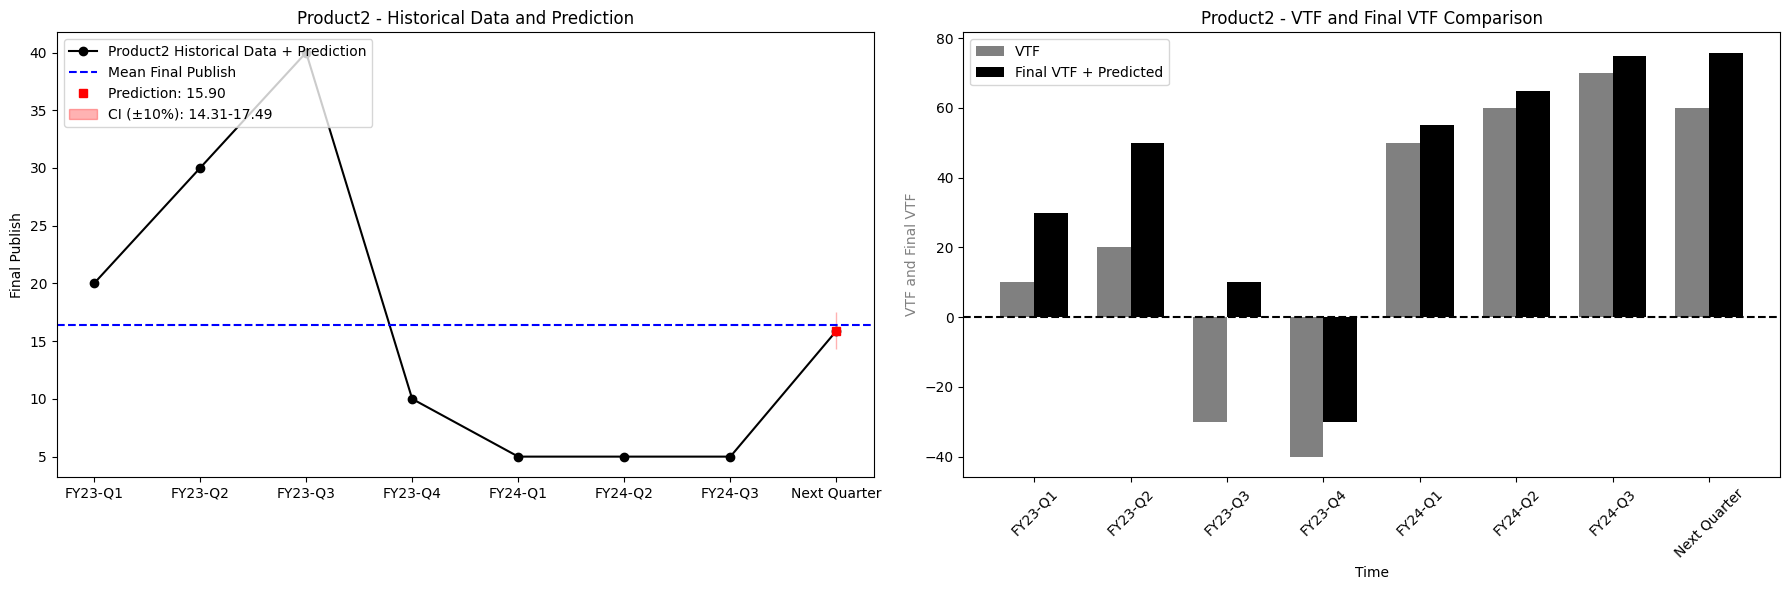

Product2 - Predicted Final Publish: 15.896500587463379
Product2 - Best parameters: {'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.3, 'alpha': 5}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


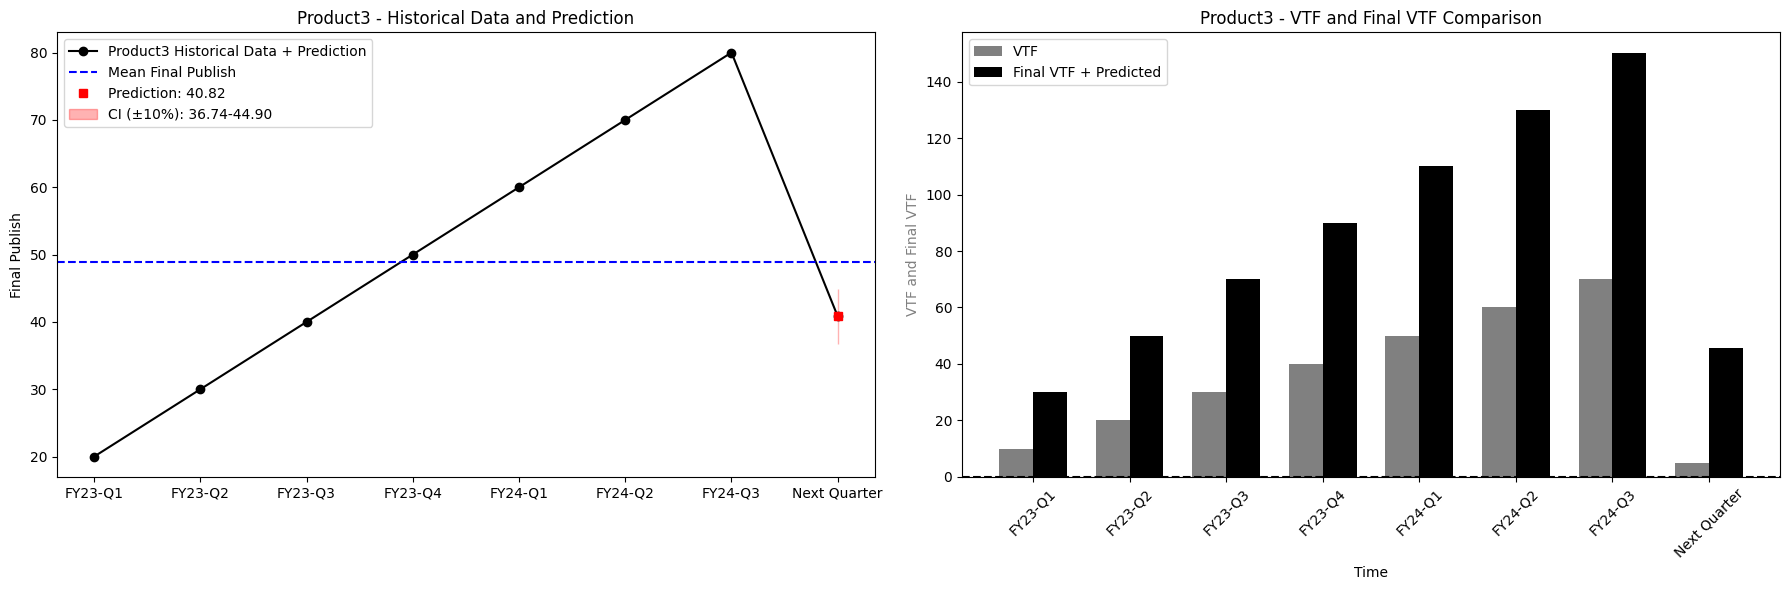

Product3 - Predicted Final Publish: 40.820526123046875
Product3 - Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.3, 'alpha': 5}


In [66]:
def analyze_product_data(product_name, product_data, data_to_predict):
    # Convert dictionary to DataFrame
    data_history = pd.DataFrame(product_data)
    data_to_predict_df = pd.DataFrame(data_to_predict)
    
    # Make 'Time' as index
    data_history.set_index('Time', inplace=True)

    # Add 'Final VTF' column by combining 'VTF' and 'Final Publish'
    data_history['Final VTF'] = data_history['VTF'] + data_history['Final Publish']

    # Define features and labels
    X = data_history[["VTF", "Before Publish Actuals", "Publish 1"]]
    y = data_history["Final Publish"]
    
    # Initialize the XGBoost regressor model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

    # Hyperparameter grid
    param_grid = {
        'colsample_bytree': [0.3, 0.7],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'alpha': [5, 10, 15],
        'n_estimators': [10, 50, 100]
    }
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1)
    
    # Fit the model
    random_search.fit(X, y)

    # Best estimator
    best_xgb_model = random_search.best_estimator_

    # Predict the 'Final Publish' for the new data
    final_publish_prediction = best_xgb_model.predict(data_to_predict_df)

    # Assuming this is the time period you're predicting for
    predicted_time = "Next Quarter"
    predicted_vtf = data_to_predict_df['VTF'].iloc[0]  # This is a simplistic assumption for demonstration

    # Append predicted 'Final Publish' and 'VTF' to data for plotting
    new_index = data_history.index.tolist() + [predicted_time]
    new_final_publish = data_history['Final Publish'].tolist() + [final_publish_prediction[0]]
    new_vtf = data_history['VTF'].tolist() + [predicted_vtf]
    new_final_vtf = data_history['Final VTF'].tolist() + [predicted_vtf + final_publish_prediction[0]]

    # Create figure and axes objects for side-by-side subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 'Final Publish' data on the first subplot (ax1)
    ax1.plot(new_index, new_final_publish, 'o-', color='black', label=f'{product_name} Historical Data + Prediction')
    mean_final_publish = np.mean(new_final_publish)
    confidence_interval = [final_publish_prediction[0] * 0.9, final_publish_prediction[0] * 1.1]
    ax1.set_ylabel('Final Publish', color='black')
    ax1.axhline(y=mean_final_publish, color='blue', linestyle='--', label='Mean Final Publish')
    ax1.plot(predicted_time, final_publish_prediction[0], 's', color='red', label=f'Prediction: {final_publish_prediction[0]:.2f}')
    ax1.fill_between([predicted_time], confidence_interval[0], confidence_interval[1], color='red', alpha=0.3, label=f'CI (±10%): {confidence_interval[0]:.2f}-{confidence_interval[1]:.2f}')
    ax1.legend(loc='upper left')
    ax1.set_title(f'{product_name} - Historical Data and Prediction')

    # Plot 'VTF' and 'Final VTF' on the second subplot (ax2)
    bar_width = 0.35
    indices = np.arange(len(new_index))
    vtf_positions = indices - bar_width/2
    final_vtf_positions = indices + bar_width/2
    ax2.bar(vtf_positions, new_vtf, width=bar_width, color='grey', label='VTF')
    ax2.bar(final_vtf_positions, new_final_vtf, width=bar_width, color='black', label='Final VTF + Predicted')
    ax2.set_ylabel('VTF and Final VTF', color='grey')
    ax2.axhline(y=0, color='black', linestyle='--')
    ax2.set_xlabel('Time')
    ax2.set_xticks(indices)
    ax2.set_xticklabels(new_index, rotation=45)
    ax2.legend(loc='upper left')
    ax2.set_title(f'{product_name} - VTF and Final VTF Comparison')

    plt.tight_layout()
    plt.show()

    # Output the prediction and best parameters
    print(f"{product_name} - Predicted Final Publish: {final_publish_prediction[0]}")
    print(f"{product_name} - Best parameters: {random_search.best_params_}")

# Adjusted for demonstration with new 'data_to_predict' structure
for product in list_of_products:
    analyze_product_data(product["name"], product["data"], product["data_to_predict"])
